In [1]:
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
from keras.layers import Convolution2D
from keras.utils.np_utils import to_categorical

from PIL import Image
from sklearn.model_selection import train_test_split


In [2]:


img_size = 64    

    

df = pd.read_csv("./Desktop/AMLS/label.csv")
lbl = pd.get_dummies(df['label'])
lbl =np.array(lbl)
path = "./Desktop/AMLS/image"
image_paths = list(paths.list_images(path))
 
images = []
    
for image_path in image_paths:
    image = cv2.imread(image_path,0)
    image = cv2.resize(image, (img_size, img_size))
    images.append(image)
plt.imshow(images[1])

In [3]:
Y = []
X = []
training_data = []
for i in range(0, 3000):
    
    if "no_tumor" in (df.iat[i,1]): 
        Y.append(lbl[i])
        X.append(images[i])
    elif "meningioma_tumor" in (df.iat[i,1]):
        Y.append(lbl[i])
        X.append(images[i])
    elif "pituitary_tumor" in (df.iat[i,1]): 
        Y.append(lbl[i])
        X.append(images[i])
    elif "glioma_tumor" in (df.iat[i,1]):
        Y.append(lbl[i])
        X.append(images[i])
for i in range(0,3000):
    training_data.append([X[i],Y[i]])


In [5]:
import random

random.shuffle(training_data)

In [6]:
Y = []
X = []
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,1)    

3000


In [7]:
X = X/255.0
Y =np.array(Y)
X.shape[1:]

(64, 64, 1)

In [8]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))   

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))     
model.add(Dropout(.2)) 

model.add(Dense(4))
model.add(Activation('softmax'))
          
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                        

In [10]:
history = model.fit(X,Y, batch_size=12,epochs=11,validation_split=0.2)

Epoch 1/11
200/200 [==============================] - 14s 65ms/step - loss: 1.1369 - accuracy: 0.5058 - val_loss: 0.8658 - val_accuracy: 0.6217
Epoch 2/11
200/200 [==============================] - 11s 54ms/step - loss: 0.7815 - accuracy: 0.6854 - val_loss: 0.6451 - val_accuracy: 0.7517
Epoch 3/11
200/200 [==============================] - 11s 53ms/step - loss: 0.6076 - accuracy: 0.7646 - val_loss: 0.5287 - val_accuracy: 0.8083
Epoch 4/11
200/200 [==============================] - 10s 52ms/step - loss: 0.4771 - accuracy: 0.8204 - val_loss: 0.4582 - val_accuracy: 0.8083
Epoch 5/11
200/200 [==============================] - 10s 51ms/step - loss: 0.3720 - accuracy: 0.8512 - val_loss: 0.3867 - val_accuracy: 0.8383
Epoch 6/11
200/200 [==============================] - 10s 49ms/step - loss: 0.3030 - accuracy: 0.8763 - val_loss: 0.2989 - val_accuracy: 0.9050
Epoch 7/11
200/200 [==============================] - 10s 49ms/step - loss: 0.2421 - accuracy: 0.9133 - val_loss: 0.2971 - val_accuracy:

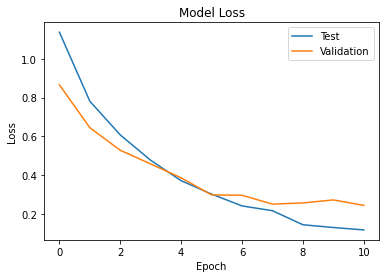

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

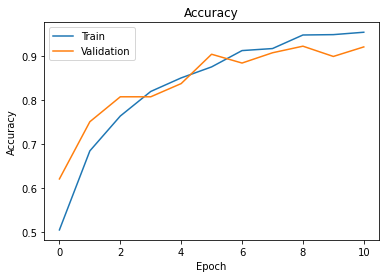

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()